In [1]:
cd ..

m:\research\federated_imputation


In [3]:
import pandas as pd
import json

## Parse Imputation Results

In [37]:
scenarios = ['ideal', 'random', 's1', 's2', 's3', 's4']
methods = ['central2', 'local', 'fedavg-s', 'cafe']
root = 'results/raw_results/codon/sample-evenly/'
ret = []

for scenario in scenarios:
    for method in methods:
        with open(root + f'/{scenario}/as_{method}@s_102931466@s_50@p_False.json') as f:
            content = json.load(f)
            ret.append({
                'scenario': scenario,
                'method': method,
                'rmse': content['results']["avg_rets_final"]["imp@rmse"],
                'sliced-ws': content['results']["avg_rets_final"]["imp@sliced_ws"]
            })
            
df = pd.DataFrame(ret)
df


,scenario,method,rmse,sliced-ws
0,ideal,central2,0.274477,0.123067
1,ideal,local,0.256368,0.131737
2,ideal,fedavg-s,0.225804,0.115159
3,ideal,cafe,0.092731,0.022918
4,random,central2,0.247951,0.107078
5,random,local,0.262739,0.136733
6,random,fedavg-s,0.194685,0.096276
7,random,cafe,0.104398,0.032435
8,s1,central2,0.241339,0.115694
9,s1,local,0.257775,0.135708


## Convergency

In [34]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#################### plot ##############################################################################
plt.rcParams['text.usetex'] = True
style_dict = {
    'central2': {
        "color": "#3274a1", # "#3274a1", "#e1812c", "#3a923a", '#c03d3e'
        "marker": ">",
        "label": r'\textbf{Central}'
    },
    "local": {
        "color": "#e1812c",
        "marker": "s",
        "label": r'\textbf{Local}'
    },
    "fedavg-s": {
        "color": "#3a923a", #"#005F73",
        "marker": "^",
        "label": r'\textbf{Savg}'
    },
    "cafe": {
        'line_width2': '1.5',
        "color": '#c03d3e',
        "marker": "o",
        "label": r"\textbf{Cafe}"
    },
}

label_size = 16
marker_size = 6
lw = '2.5'

plt.rcParams.update({'figure.dpi': '200'})
def conv_plots(scenario):
    
    # read results
    root = './results/raw_results/codon/sample-evenly'
    methods = ['central2', 'local', 'fedavg-s', 'cafe']
    data_dict = {}
    for method in methods:
        # read corresponding json file
        with open(root + f'/{scenario}/as_{method}@s_102931466@s_50@p_False.json') as f:
            result = json.load(f)
    
        # process result
        imp_ret = result["results"]["clients_imp_ret_clean"]["imp@rmse"]
        del imp_ret['client_avg']
        data_dict[method] = np.array(list(imp_ret.values()))
    
    fig, axes = plt.subplots(1, 1, figsize=(4, 2.5), sharey = False)
    for method in data_dict.keys():
        # process data
        data = data_dict[method]
        x = np.arange(data.shape[1])
        if method == 'central2':
            data = data[:-1, 0:21]
        ls = '-'
        line_df = pd.DataFrame(data.T)
        line_df = line_df.reset_index()
        line_df = line_df.melt('index', var_name='cols',  value_name='vals')
        sns.lineplot(
            data = line_df, x = 'index', y = 'vals', ax = axes, color = style_dict[method]['color'], err_style = 'band',
            legend=False, linewidth = lw, linestyle = ls
        )
        
    axes.set_xlabel(r"Iterations", fontname="Computer Modern Serif", fontsize = 22)
    axes.set_ylabel(r"RMSE", fontname="Computer Modern Serif", fontsize = 22)
    axes.grid(False)
    axes.set_xticks([0, 5, 10, 15, 20])
    axes.set_xticklabels([0, 5, 10, 15, 20], fontsize = 16)
    
    y_lim = axes.get_ylim()
    axes.set_ylim([y_lim[0] - 0.02, y_lim[1] + 0.02])

    axes.set_yticks([0.10, 0.20, 0.30])
    axes.set_yticklabels([0.10, 0.20, 0.30], fontsize = 16)
    
    # Create custom legends
    triangle_blue_solid = mlines.Line2D(
        [], [], color="#1f77b4", linestyle='-', label=r'\textbf{Central}', linewidth='3')
    square_orange_solid = mlines.Line2D(
        [], [], color="#FF9500", linestyle='-', label=r'\textbf{Local}', linewidth='3')
    triangle_green_solid = mlines.Line2D(
        [], [], color="#0A9396", linestyle='-', label=r'\textbf{Savg}', linewidth='3')
    circle_red_solid = mlines.Line2D(
        [], [], color="#AE2012", linestyle='-', label=r'\textbf{Cafe}', linewidth='3')
        
    plt.legend(
        handles=[triangle_blue_solid, square_orange_solid, triangle_green_solid, circle_red_solid], 
        loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon = False, prop = { "size": 12, 'weight': 'bold'})
    plt.subplots_adjust(wspace=0.18, hspace=0.0)
    plt.savefig(f'figures/conv_ideal_err_all.png', dpi=300, bbox_inches="tight")
    plt.show()

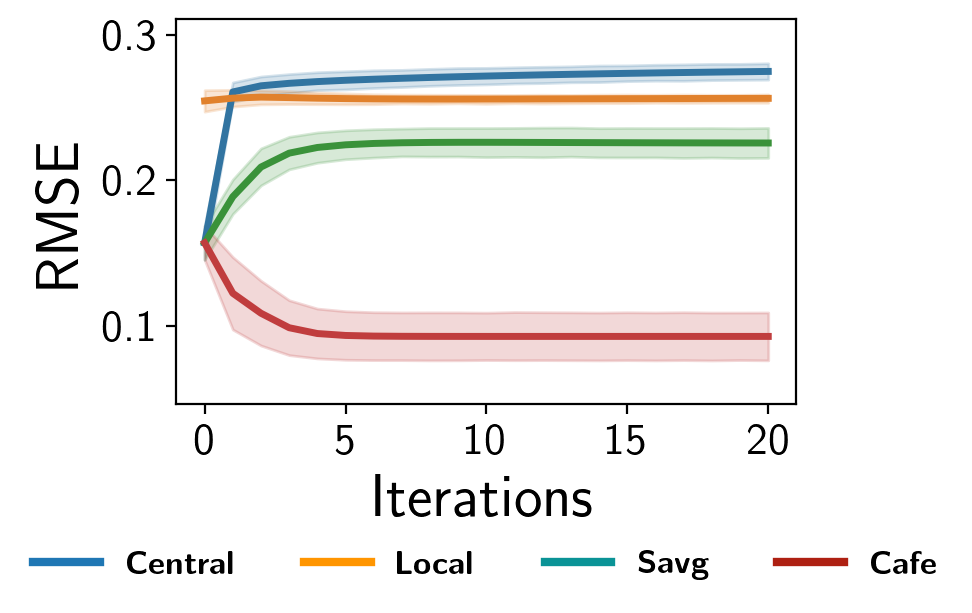

In [35]:
conv_plots('ideal')

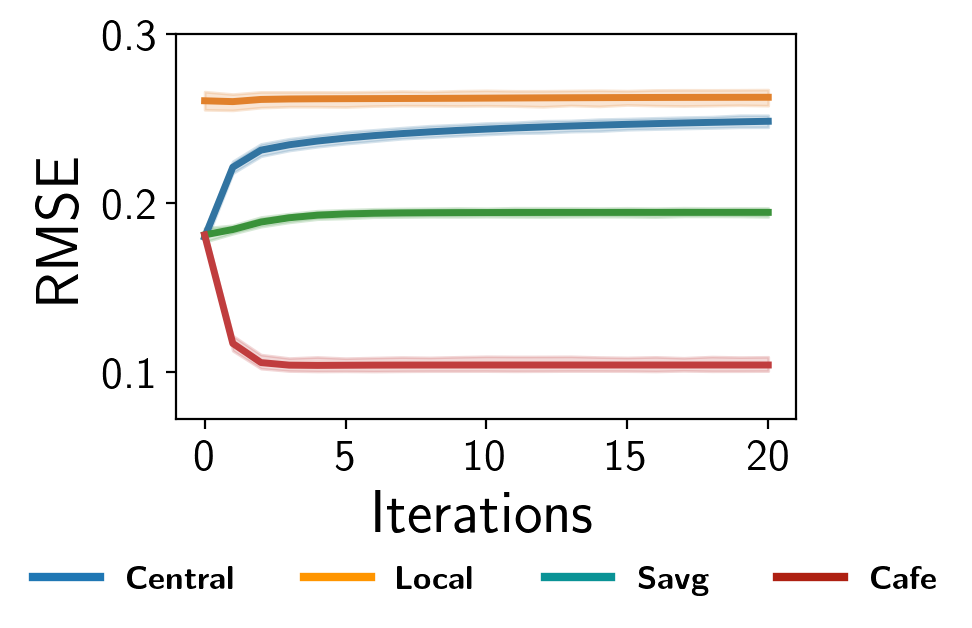

In [36]:
conv_plots('random')

## TSNE Plots

## Visualization of Imputation Quality

In [48]:
style_dict2 = {
    "central2": {
        "color": '#1f77b4', # 
        "marker": "x",
        'label': r'Central'
    }, 
    "local": {
        "color": '#ff8920',
        "marker": "^",
        "label": r'Local'
    },
    "fedavg-s": {
        "color": '#32a332',
        "marker": "s",
        "label": r'Savg'
    },
    "cafe": {
        "color": "#AE2012", #'#d62728'
        "marker": "o",
        "label": r"Cafe"
    },
}


In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def make_bold(string):
    string = r'\textbf{' + fr"{string}" + r'}'
    return string

def draw_line_plot(
        all_metric_data, metrics, scenarios, metrics_name, share_y = False, output_name = None, style_dict = None, other_params = None,
        dataset_name = None, pred = False, legend = True
    ):
    
    plt.rcParams['text.usetex'] = True
    plt.rcParams.update({'figure.dpi': '200'})

    ls = other_params['ls']
    lw = other_params['lw']
    marker_size = other_params['marker_size']
    hs = other_params['hs']
    labels = {'central2': 'Central', 'local': 'Local', 'fedavg-s': 'Savg', 'cafe': 'Cafe'}
    #with plt.style.context(['science', 'ieee', 'scatter']):
    if share_y:
        fig, axes = plt.subplots(len(metrics), 1, figsize=(3, 2*len(metrics)), squeeze = False, sharey = 'row', sharex = True)
    else:
        fig, axes = plt.subplots(len(metrics), 1, figsize=(3, 2*len(metrics)), squeeze = False, sharey = False, sharex = True)
    
    for row_idx, metric in enumerate(metrics):
        data = all_metric_data[metric]
        for col_idx, dataset in enumerate(data.keys()):
            for method in ['central2', 'local', 'simpleavg', 'cafe']:
                print(data)
                axes[row_idx, col_idx].plot(
                    np.arange(len(scenarios)), data[dataset][method], 
                    color = style_dict[method]['color'], 
                    linestyle = ls, 
                    label = make_bold(labels[method]), 
                    linewidth = lw,
                    marker = style_dict[method]['marker'],
                    markersize = marker_size,
                    fillstyle = 'none'
                )
                
            axes[row_idx, col_idx].set_xlim([-0.5, len(scenarios) -1 + 0.5])
            
            if row_idx == 1:
                axes[row_idx, col_idx].set_xticks(np.arange(len(scenarios)))
                axes[row_idx, col_idx].set_xticklabels([make_bold(item) for item in scenarios], fontsize = 14)
            
            if row_idx == 0:
                axes[row_idx, col_idx].set_title(make_bold(dataset_name[col_idx]), fontsize = 16)
            
            if col_idx == 0:
                axes[row_idx, col_idx].set_ylabel(make_bold(metrics_name[row_idx]), fontsize = 16)
            axes[row_idx, col_idx].grid(False)
            if share_y:
                axes[row_idx, col_idx].yaxis.grid(True)
            else:
                axes[row_idx, col_idx].yaxis.grid(False)
            axes[row_idx, col_idx].spines['bottom'].set_color('grey')
            axes[row_idx, col_idx].spines['top'].set_color('white')
            axes[row_idx, col_idx].spines['left'].set_color('grey')
            axes[row_idx, col_idx].spines['right'].set_color('white')
        
    if share_y == False:
        # set ticks lim for all subplots
        if pred == False:
            for ax in axes.flat[0:10]:
                ylim = ax.get_ylim()
                ax.set_ylim([ylim[0] - 0.02, ylim[1] + 0.02])
            
            for ax in axes.flat[10:]:
                ylim = ax.get_ylim()
                ax.set_ylim([ylim[0] - 2, ylim[1] + 2])
            
            for ax in axes.flat:
                ax.tick_params(axis=u'y', labelsize=13)
        else:
             
            for ax in axes.flat:
                ylim = ax.get_ylim()
                ax.set_ylim([ylim[0] - 2, ylim[1] + 2])
            
            for ax in axes.flat:
                ax.tick_params(axis=u'y', labelsize=13)
             
        
    else:
        formatter = ticker.FormatStrFormatter('%.2f')
        for ax in axes.flat[0:8]:
            ax.yaxis.set_major_formatter(formatter)
        for ax in axes.flat:
            ax.tick_params(axis=u'y', labelsize=13)    
    
    if share_y:
        plt.subplots_adjust(wspace=0.1, hspace=hs)
        if legend:
            plt.legend(ncol = 4, bbox_to_anchor=(-1.9, -0.2), loc='upper center', frameon = False, prop = { "size": 16, 'weight': 'bold'})
    else:
        if legend:
            plt.legend(ncol = 4, bbox_to_anchor=(-2.05, -0.2), loc='upper center', frameon = False, prop = { "size": 16, 'weight': 'bold'})
        plt.subplots_adjust(wspace=0.15, hspace=hs)
        
    plt.savefig(f'figures/{output_name}.png', dpi=600, bbox_inches="tight")
    plt.show()

{'codon': {'central2': [0.2744774292899009, 0.2479514906996254, 0.24133874505205397, 0.24646824455809443, 0.25424165942856847, 0.2546972661719533], 'local': [0.2563678575081614, 0.26273898074089996, 0.25777454994211585, 0.26887388762220926, 0.2689721991787664, 0.2511510352797586], 'fedavg-s': [0.22580425332829918, 0.19468509936807302, 0.22601902944292535, 0.22781380931905298, 0.25561456424025863, 0.24807546476663228], 'cafe': [0.09273113899861782, 0.10439846408800144, 0.10203578302892065, 0.18331252088741679, 0.2614871596528082, 0.24829924289121422]}}


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

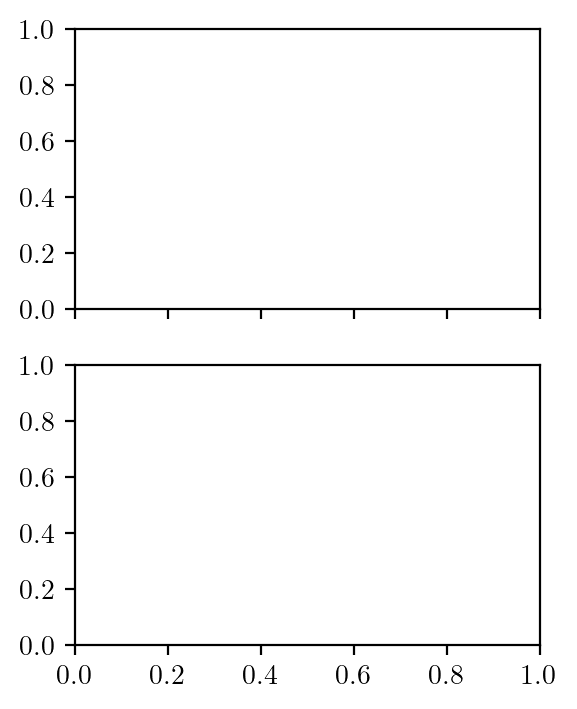

In [52]:
# read data
datasets = ['codon']
all_metric_data = {}
metrics_name = ['RMSE', 'Sliced-WS']
metrics = ['rmse', 'sliced-ws']
for metric in metrics:
    data = {}
    scenarios = ['ideal', 's1', 's2', 's3', 's4']

    for dataset in datasets:
        data[dataset] = {}
        for method in ['central2', 'local', 'fedavg-s', 'cafe']:
            ret = df[df['method'] == method].copy()
            ret['scenario'] = pd.Categorical(ret['scenario'], categories = scenarios, ordered = True)
            ret = ret.sort_values(by = 'scenario')
            data[dataset][method] = list(ret[metric].values)
            
    all_metric_data[metric] = data

draw_line_plot(
    all_metric_data, 
    metrics, scenarios = ['Ideal', 'S1', 'S2', 'S3', 'S4'], metrics_name = metrics_name,
    share_y = False, output_name='line_comp',
    style_dict = style_dict2,
    other_params={
        'ls': '-', 'lw': '2', 'marker_size': 7, 'hs': 0.15
    },
    dataset_name = ['Codon']
    )
